In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
#Read dataset

df = pd.read_csv('H:/Machine Learning Module/Data sets/Titanic_Data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


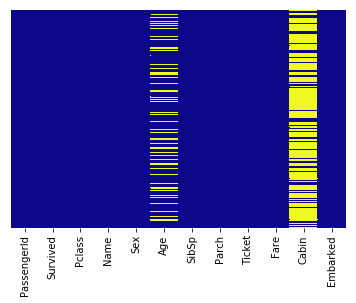

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.show()

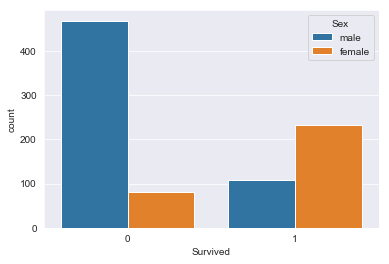

In [10]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

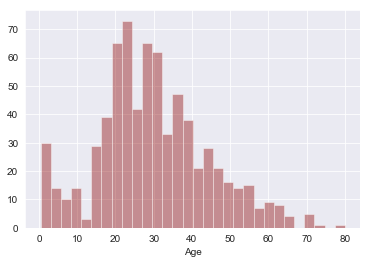

In [11]:
#distributionn of age of the people

sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)
#sns.distplot(df['Age'].dropna,kde=False,bins=30,color='Purple')
plt.show()

# cleaning and preprocessing

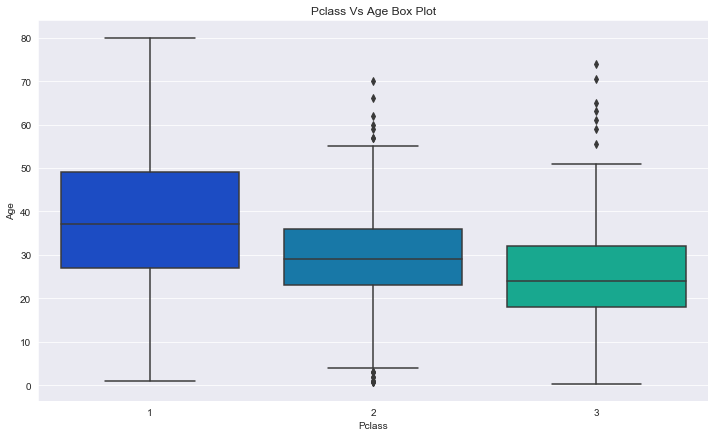

In [12]:
plt.figure(figsize=(12,7))
plt.title('Pclass Vs Age Box Plot')
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')
plt.show()

In [13]:
#for class 1
class_1 = df[df['Pclass']==1]
class_1 = class_1.dropna()
sum_age = class_1['Age'].sum()
avg_age =sum_age /158
avg_age
#for class 2
class_1 = df[df['Pclass']==2]
class_1 = class_1.dropna()
sum_age = class_1['Age'].sum()
avg_age =sum_age /class_1.count()
avg_age
#for class 3
class_1 = df[df['Pclass']==3]
class_1 = class_1.dropna()
sum_age = class_1['Age'].sum()
avg_age =sum_age /class_1.count()
avg_age

PassengerId    21.0
Survived       21.0
Pclass         21.0
Name           21.0
Sex            21.0
Age            21.0
SibSp          21.0
Parch          21.0
Ticket         21.0
Fare           21.0
Cabin          21.0
Embarked       21.0
dtype: float64

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 26
        else:
            return 21
    else:
        return Age

df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)    

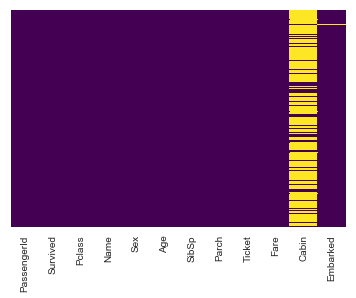

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [16]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
#Converting categorical variable into dummy/indicator variables using get_dummy() method

sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)


In [19]:
#drop the sex,embarked,name and tickets,columns
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
#concatenate new sex and embark column to our train dataframe
df=pd.concat([df,sex,embark],axis=1)
#check the head of dataframe
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'], test_size=0.30,random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logR =LogisticRegression()
logR.fit(X_train,y_train)
confidence = logR.score(X_test,y_test)
print(confidence)


0.820224719101


In [28]:
prediction = logR.predict(X_test)
print(prediction)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[151  12]
 [ 36  68]]
